In [1]:
import numpy as np
import sympy as sp
import pickle
import pandas as pd
from two_qubit_compiling import *
from plotnine import *

In [5]:
# This is the look-up table

# with open(r"someobject.pickle", "rb") as input_file:
#     T = pickle.load(input_file)

# You'll have to build your own look-up table, github won't let me upload it

T = full_look_up_table(11)

In [14]:
# I use pandas dataframes to strore the data.
# It makes plotting much easier using plotnine (a python equivalent of ggplot)

df = pd.DataFrame(columns=['count','method','output'])
counts = [50,100,150,200,250]
index = 0
for c in counts:
    print(c)
    for i in range(20):
        print(i)
        temp,seq = random_operation(c)
        std = compile(temp)
        output = len(std[0])
        df.loc[index] = [c,'std',output]
        index += 1
        pre = preprocessing(temp)
        output = len(pre[0])
        df.loc[index] = [c,'pre',output]
        index += 1
        post = postprocessing(std[0],T,12)
        output = len(post[0])
        df.loc[index] = [c,'post',output]
        index += 1
        both = postprocessing(pre[0],T,12)
        output = len(both[0])
        df.loc[index] = [c,'both',output]
        index += 1

50
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
100
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
150
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
200
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
250
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


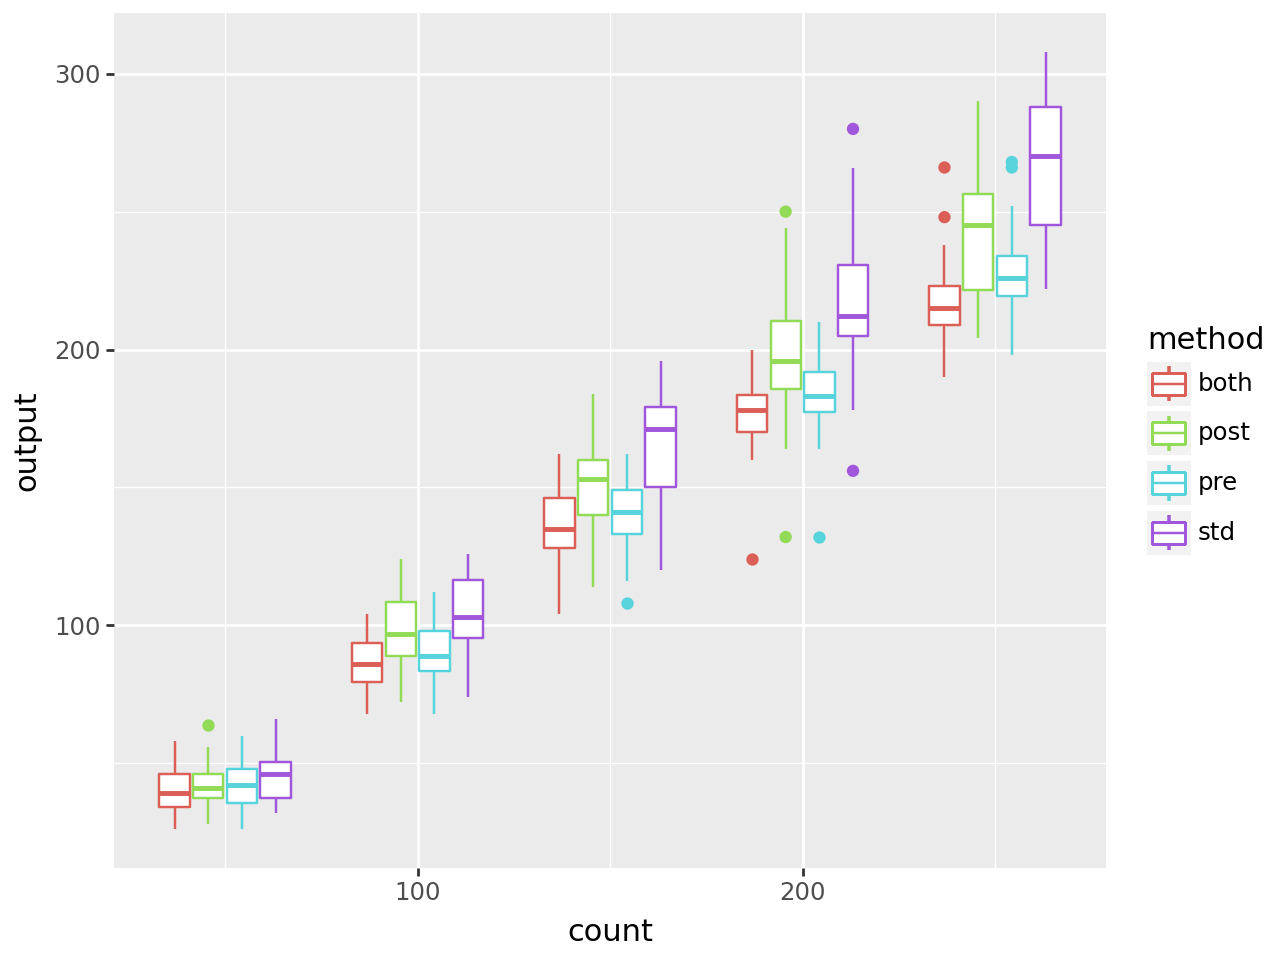

In [21]:
ggplot() \
+ geom_boxplot(df[df['count']==50],aes('count','output',color='method'),width=35) \
+ geom_boxplot(df[df['count']==100],aes('count','output',color='method'),width=35) \
+ geom_boxplot(df[df['count']==150],aes('count','output',color='method'),width=35) \
+ geom_boxplot(df[df['count']==200],aes('count','output',color='method'),width=35) \
+ geom_boxplot(df[df['count']==250],aes('count','output',color='method'),width=35)

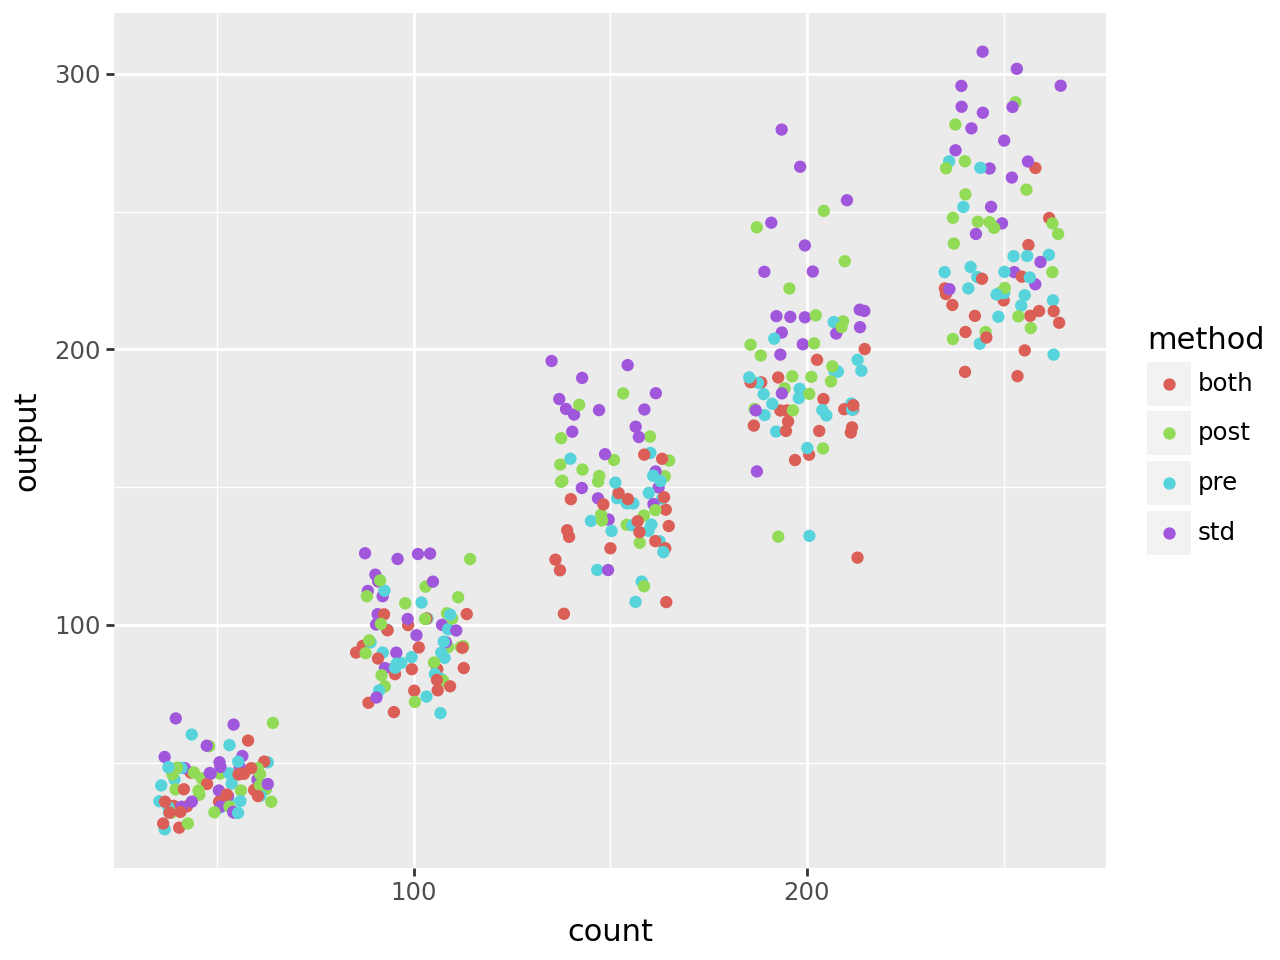

In [17]:
ggplot(df,aes('count','output',color='method')) + geom_jitter(width=15)